In [147]:
import pandas as pd
import numpy as np
import requests
from pandas.io.json import json_normalize
from flatten_json import flatten
from datetime import date

In [151]:
#import
pm25 = pd.read_csv('data/openaq_pm25.csv')
no2 = pd.read_csv('data/openaq_NO2.csv')
o3 = pd.read_csv('data/openaq_o3.csv')
co = pd.read_csv('data/openaq_co.csv')
so2 = pd.read_csv('data/openaq_so2.csv')

In [154]:
# Concat pm25 e NO2
data = pd.concat([pm25,no2,o3,co,so2])
# data.shape = (165943, 12)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


(165943, 12)

In [155]:
data.shape
data.columns

Index(['Unnamed: 0', 'city', 'coordinates_latitude', 'coordinates_longitude',
       'country', 'date_local', 'date_utc', 'index', 'location', 'parameter',
       'unit', 'value'],
      dtype='object')

# Date

In [156]:
data['datetime'] = pd.to_datetime(data['date_utc'])
data['date'] = data['datetime'].dt.strftime('%Y-%m-%d')
data['hour'] = data['datetime'].dt.strftime('%H:%M:%S')
data.head()

,Unnamed: 0,city,coordinates_latitude,coordinates_longitude,country,date_local,date_utc,index,location,parameter,unit,value,datetime,date,hour
0,0,Madrid,40.59333,-3.50306,ES,2020-03-30T03:00:00+02:00,2020-03-30T01:00:00.000Z,0,ES1838A,pm25,µg/m³,25.0,2020-03-30 01:00:00+00:00,2020-03-30,01:00:00
1,1,Madrid,40.63389,-4.01333,ES,2020-03-30T03:00:00+02:00,2020-03-30T01:00:00.000Z,1,ES1803A,pm25,µg/m³,13.0,2020-03-30 01:00:00+00:00,2020-03-30,01:00:00
2,2,Madrid,40.18528,-3.67972,ES,2020-03-30T03:00:00+02:00,2020-03-30T01:00:00.000Z,2,ES1809A,pm25,µg/m³,10.0,2020-03-30 01:00:00+00:00,2020-03-30,01:00:00
3,3,Madrid,40.43000,-3.54583,ES,2020-03-30T03:00:00+02:00,2020-03-30T01:00:00.000Z,3,ES1869A,pm25,µg/m³,35.0,2020-03-30 01:00:00+00:00,2020-03-30,01:00:00
4,4,Madrid,40.47917,-3.37778,ES,2020-03-30T03:00:00+02:00,2020-03-30T01:00:00.000Z,4,ES1563A,pm25,µg/m³,18.0,2020-03-30 01:00:00+00:00,2020-03-30,01:00:00


In [157]:
# Separar dia e mês
data['day'] = data['date'].apply(lambda x: str(x)[8:])
data['month'] = data['date'].apply(lambda x: str(x)[5:7])
data.head()

,Unnamed: 0,city,coordinates_latitude,coordinates_longitude,country,date_local,date_utc,index,location,parameter,unit,value,datetime,date,hour,day,month
0,0,Madrid,40.59333,-3.50306,ES,2020-03-30T03:00:00+02:00,2020-03-30T01:00:00.000Z,0,ES1838A,pm25,µg/m³,25.0,2020-03-30 01:00:00+00:00,2020-03-30,01:00:00,30,03
1,1,Madrid,40.63389,-4.01333,ES,2020-03-30T03:00:00+02:00,2020-03-30T01:00:00.000Z,1,ES1803A,pm25,µg/m³,13.0,2020-03-30 01:00:00+00:00,2020-03-30,01:00:00,30,03
2,2,Madrid,40.18528,-3.67972,ES,2020-03-30T03:00:00+02:00,2020-03-30T01:00:00.000Z,2,ES1809A,pm25,µg/m³,10.0,2020-03-30 01:00:00+00:00,2020-03-30,01:00:00,30,03
3,3,Madrid,40.43000,-3.54583,ES,2020-03-30T03:00:00+02:00,2020-03-30T01:00:00.000Z,3,ES1869A,pm25,µg/m³,35.0,2020-03-30 01:00:00+00:00,2020-03-30,01:00:00,30,03
4,4,Madrid,40.47917,-3.37778,ES,2020-03-30T03:00:00+02:00,2020-03-30T01:00:00.000Z,4,ES1563A,pm25,µg/m³,18.0,2020-03-30 01:00:00+00:00,2020-03-30,01:00:00,30,03


In [158]:
# data.dtypes
data['month'] = data['month'].astype(int)
data['day'] = data['day'].astype(int)
data.dtypes
# data.head()

Unnamed: 0                             int64
city                                  object
coordinates_latitude                 float64
coordinates_longitude                float64
country                               object
date_local                            object
date_utc                              object
index                                  int64
location                              object
parameter                             object
unit                                  object
value                                float64
datetime                 datetime64[ns, UTC]
date                                  object
hour                                  object
day                                    int32
month                                  int32
dtype: object

# Data cleaning

In [159]:
data.month.unique()
data.day.unique()
# data = data.groupby(['CountryName'])['CountryName'].count()

array([30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 31, 16, 15,
       14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  3,  2,  1,  4],
      dtype=int64)

In [160]:
# Removing columns
data.columns
data.drop(columns=['Unnamed: 0'], inplace =True)
data.columns

Index(['city', 'coordinates_latitude', 'coordinates_longitude', 'country',
       'date_local', 'date_utc', 'index', 'location', 'parameter', 'unit',
       'value', 'datetime', 'date', 'hour', 'day', 'month'],
      dtype='object')

In [161]:
# Cleaning names
data['city'].replace(['New York-Northern New Jersey-Long Island'], 'New York', inplace = True)
data.city.unique()

array(['Madrid', 'Delhi', 'Lisboa', 'New York', 'Santiago'], dtype=object)

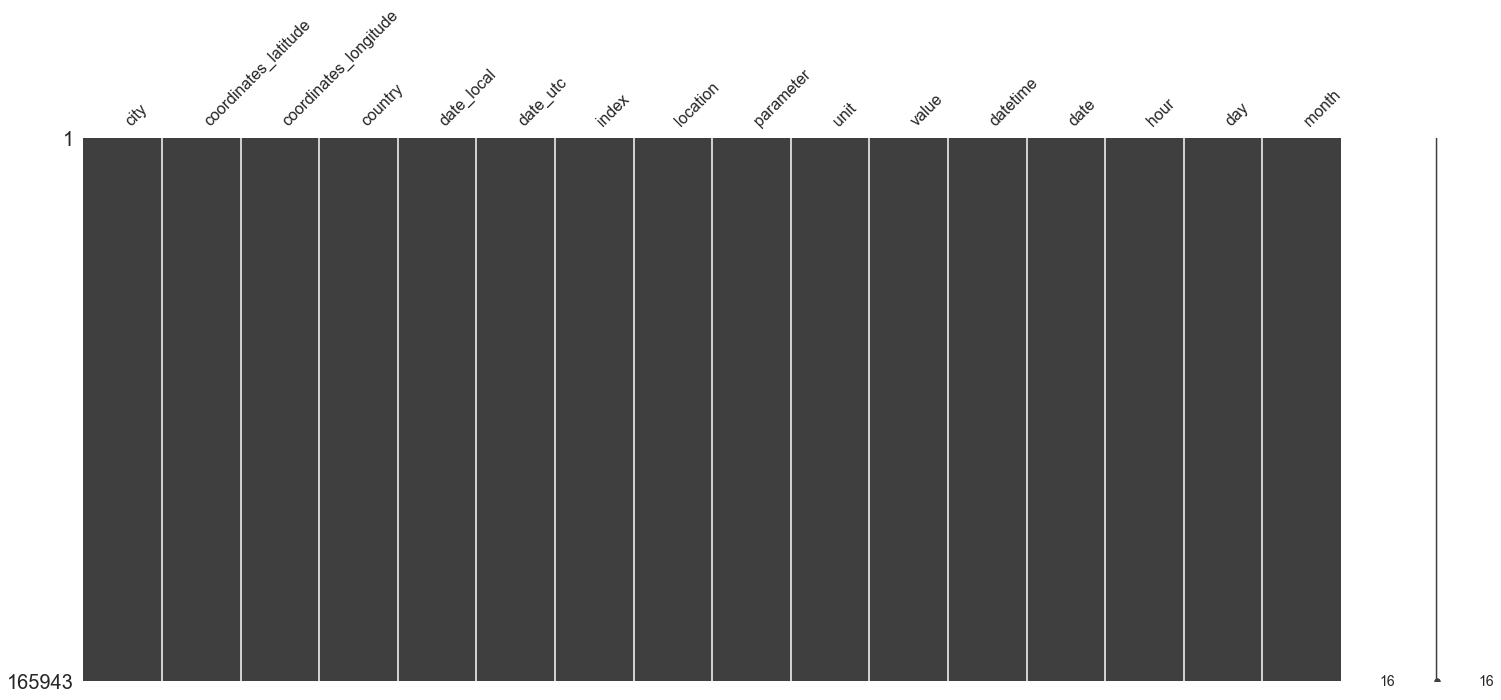

In [162]:
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
msno.matrix(data)
plt.show()

In [163]:
data.isnull().sum()

city                     0
coordinates_latitude     0
coordinates_longitude    0
country                  0
date_local               0
date_utc                 0
index                    0
location                 0
parameter                0
unit                     0
value                    0
datetime                 0
date                     0
hour                     0
day                      0
month                    0
dtype: int64

In [213]:
# Estatística descritiva
data_summary = data.groupby(['city', 'month','parameter'])['value'].describe().reset_index()
data_summary
# # data_summary.dtypes
# # função pra calcular a diff 
# data_summary
# # co_2 - co_3/co_2

,city,month,parameter,count,mean,std,min,25%,50%,75%,max
0,Delhi,2.0,co,4968.0,959.633414,625.958626,0.90,540.000,810.000,1300.0000,3560.00
1,Delhi,2.0,no2,4997.0,43.613368,301.414805,2.54,24.600,35.800,50.8000,21299.17
2,Delhi,2.0,pm25,4976.0,88.972659,65.411731,2.00,69.000,82.320,100.2875,2000.00
3,Delhi,2.0,so2,9988.0,12.689233,9.153416,0.30,7.600,10.920,15.6000,155.20
4,Delhi,3.0,co,4954.0,511.330319,375.483995,0.40,240.000,400.000,700.0000,2390.00
5,Delhi,3.0,no2,4754.0,18.974754,74.776201,0.02,9.270,12.825,18.9000,3813.83
6,Delhi,3.0,pm25,4768.0,88.387341,264.050370,0.08,17.000,28.000,46.0000,2000.00
7,Delhi,3.0,so2,9976.0,10.648853,6.817977,0.10,6.200,9.600,14.8000,106.60
8,Lisboa,2.0,co,3158.0,427.826789,220.285847,107.00,268.000,377.000,515.0000,1781.00
9,Lisboa,2.0,no2,5000.0,34.823920,26.299808,1.30,14.300,27.900,49.3250,187.00


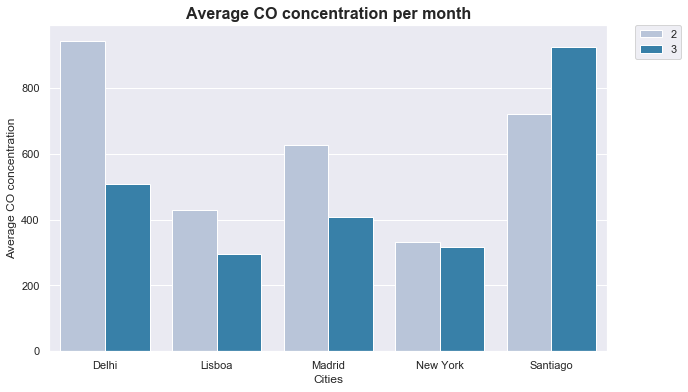

In [202]:
fig, ax1 = plt.subplots(1,1, figsize=(10,6))

co = data_summary.loc[data_summary['parameter'] == 'co']
co
#pliot
g = sns.barplot(x="city", y='mean', hue='month', 
    data=co, palette = 'PuBu', ax=ax1)

#legend
plt.legend(title='Month', loc='upper left', labels=['February', 'March'])

# ax.set_xticklabels(['February, 'March'])
ax1.set_xlabel("Cities")
ax1.set_ylabel("Average CO concentration")
ax1.set_title('Average CO concentration per month', fontsize=16, fontweight='bold')

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show(g)

#Save:
g.figure.savefig('data/co_average.png')


# colocar linha

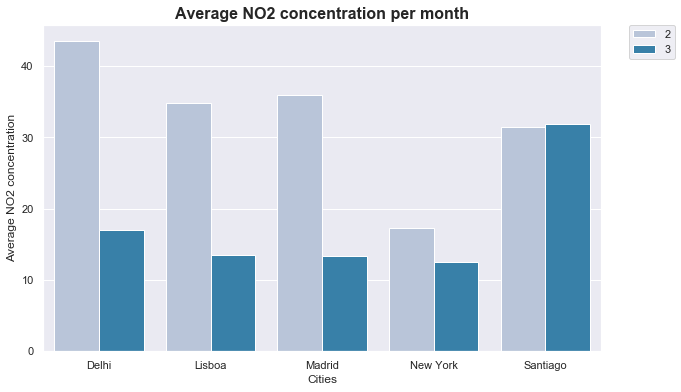

In [203]:
fig, ax1 = plt.subplots(1,1, figsize=(10,6))

no2 = data_summary.loc[data_summary['parameter'] == 'no2']
no2
#pliot
g = sns.barplot(x="city", y='mean', hue='month', 
    data=no2, palette = 'PuBu', ax=ax1)

#legend
plt.legend(title='Month', loc='upper left', labels=['February', 'March'])

# ax.set_xticklabels(['February, 'March'])
ax1.set_xlabel("Cities")
ax1.set_ylabel("Average NO2 concentration")
ax1.set_title('Average NO2 concentration per month', fontsize=16, fontweight='bold')

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

#Save:
g.figure.savefig('data/no2_average.png')

# colocar linha

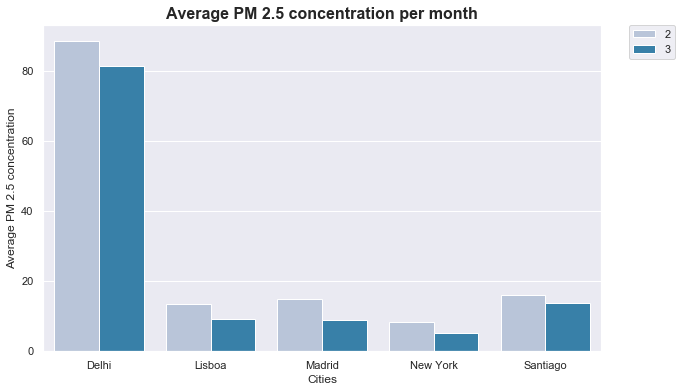

In [204]:
fig, ax1 = plt.subplots(1,1, figsize=(10,6))

pm25 = data_summary.loc[data_summary['parameter'] == 'pm25']
pm25
#plot
g = sns.barplot(x="city", y='mean', hue='month', 
    data=pm25, palette = 'PuBu', ax=ax1)

#legend
plt.legend(title='Month', loc='upper left', labels=['February', 'March'])

# ax.set_xticklabels(['February, 'March'])
ax1.set_xlabel("Cities")
ax1.set_ylabel("Average PM 2.5 concentration")
ax1.set_title('Average PM 2.5 concentration per month', fontsize=16, fontweight='bold')

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

#Save:
g.figure.savefig('data/pm25_average.png')

# colocar linha

In [186]:
# # remove rows > 400
# data = data.where(data['value'] < 350)
# data.sort_values(by="value").head()
# data = data.dropna()
# # data.shape (10395)

# remove rows abaixo de -100
data = data.where(data['value'] > 0)
data.sort_values(by="value").head()
data = data.dropna()
data.shape

(150597, 16)

In [15]:
# # # analise de corrrelação entre stringency index e mean de ar quality
# ax = sns.scatterplot(x="city", y="value", hue = 'parameter', sizes=(10, 200),data=data)

# #ao inves de mes fazer por semanas?

# Data Vis

## PM 2.5

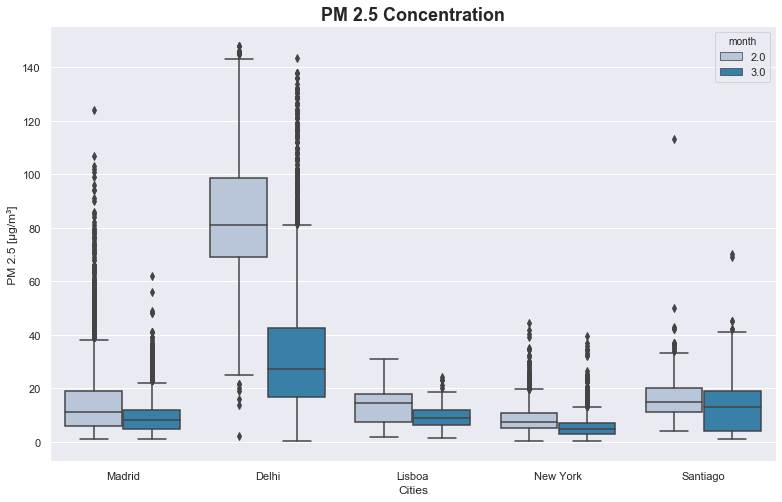

In [205]:
pm25 = data.loc[data['parameter'] == 'pm25']

# Outliers
# remove rows > 125
pm25 = pm25.where(pm25['value'] < 150)
pm25.sort_values(by="value", ascending = False).head()

pm25 = pm25.dropna()
# madrid.shape(9889)

sns.set()
fig, ax = plt.subplots(figsize=(13,8))
g = sns.boxplot(x="city", y="value", hue = "month",
                  data=pm25, palette="PuBu")

# ax.set_xticklabels(['February, 'March'])
ax.set_xlabel("Cities")
ax.set_ylabel(" PM 2.5 [µg/m³] ")
ax.set_title('PM 2.5 Concentration', fontsize=18, fontweight='bold')
  
plt.show()

#Save:
g.figure.savefig('data/pm25_box.png')

# NO2

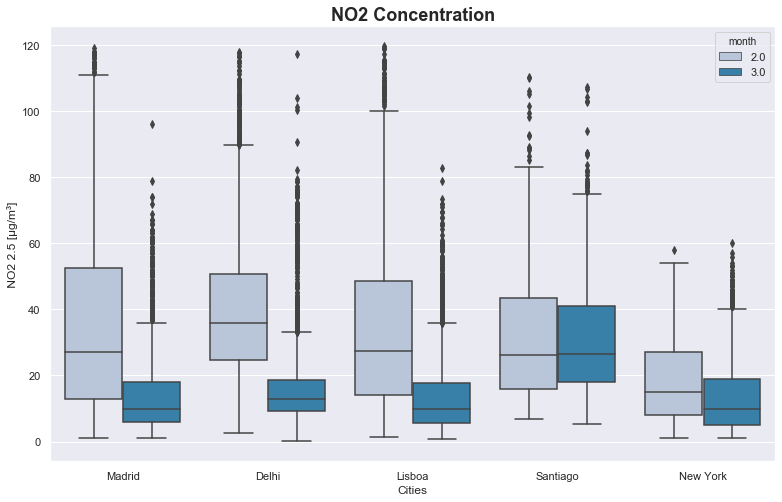

In [206]:
no2 = data.loc[data['parameter'] == 'no2']

# Outliers
# # remove rows > 125
no2 = no2.where(no2['value'] < 120)
no2.sort_values(by="value", ascending = False).head()

no2 = no2.dropna()
# # madrid.shape(9889)

sns.set()
fig, ax = plt.subplots(figsize=(13,8))
g = sns.boxplot(x="city", y="value", hue = "month",
                  data=no2, palette="PuBu")

# ax.set_xticklabels(['February, 'March'])
ax.set_xlabel("Cities")
ax.set_ylabel(" NO2 2.5 [µg/m³] ")
ax.set_title('NO2 Concentration', fontsize=18, fontweight='bold')
  
plt.show()

#Save:
g.figure.savefig('data/no2_box.png')

# O3

In [195]:
# o3 = data.loc[data['parameter'] == 'o3']

# # Outliers
# # # remove rows > 125
# o3 = o3.where(o3['value'] < 175)
# o3.sort_values(by="value", ascending = False).head()

# o3 = o3.dropna()
# # # madrid.shape(9889)

# sns.set()
# fig, ax = plt.subplots(figsize=(13,8))
# ax = sns.boxplot(x="city", y="value", hue = "month",
#                   data=o3, palette="PuBu")

# # ax.set_xticklabels(['February, 'March'])
# ax.set_xlabel("Cities")
# ax.set_ylabel(" PM 2.5 [µg/m³] ")
# ax.set_title('Concentração PM 2.5', fontsize=18, fontweight='bold')
  
# plt.show()

# #Save:
# plt.savefig('data/pm25_box.png')

# CO

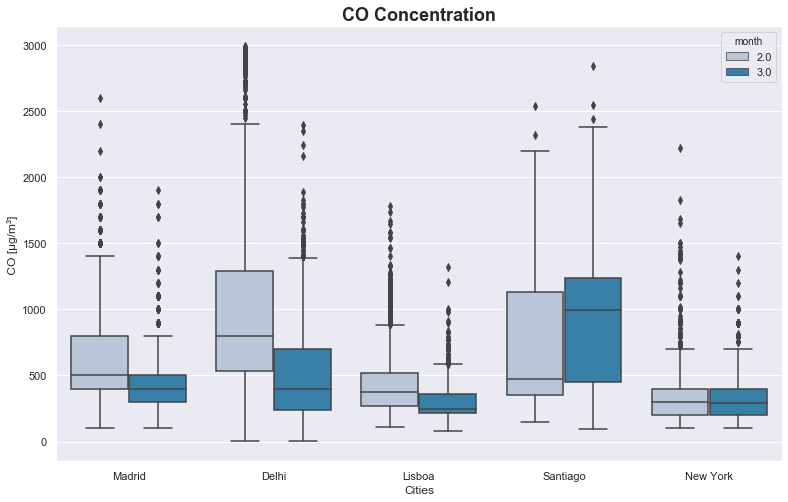

In [207]:
co = data.loc[data['parameter'] == 'co']
co.head()
# Outliers
# remove rows > 3000
co =co.where(co['value'] < 3000)
co.sort_values(by="value", ascending = False).head()
co =co.dropna()
# # madrid.shape(9889)

sns.set()
fig, ax = plt.subplots(figsize=(13,8))
g = sns.boxplot(x="city", y="value", hue = "month",
                  data = co, palette="PuBu")

# ax.set_xticklabels(['February, 'March'])
ax.set_xlabel("Cities")
ax.set_ylabel(" CO [µg/m³] ")
ax.set_title('CO Concentration', fontsize=18, fontweight='bold')
  
plt.show()

#Save:
g.figure.savefig('data/co_box.png')

## Madrid

In [20]:
# madrid = data.loc[data['city'] == 'Madrid']
# madrid = madrid.loc[madrid['parameter'] == 'pm25']
# madrid.head()

# # Outliers
# # remove rows > 125
# madrid = madrid.where(madrid['value'] < 50)
# madrid.sort_values(by="value", ascending = False).head()

# madrid = madrid.dropna()
# # madrid.shape(9889)

# sns.set()
# fig, ax = plt.subplots(figsize=(8,6))
# ax = sns.boxplot(x="month", y="value",
#                   data=madrid, palette="Blues_d")

# ax.set_xticklabels(['February', 'March'])
# ax.set_xlabel(" Months ")
# ax.set_ylabel(" PM 2.5")
# ax.set_title('PM 2.5 in Madrid')
   
# plt.show()

# IQA

In [127]:
# pm25
pm25_group = pm25.groupby(['city','month','day'])['value'].agg(['mean']).reset_index()
pm25_group.head()

,city,month,day,mean
0,Delhi,2.0,27.0,96.617530
1,Delhi,2.0,28.0,74.714527
2,Delhi,2.0,29.0,68.336897
3,Delhi,3.0,28.0,26.557788
4,Delhi,3.0,29.0,28.821943


In [129]:
# Categories
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

bins = pd.IntervalIndex.from_tuples([(0, 20), (21, 35), (36, 50), (51,100), (101,1200)])
bins_labels = ['Very Good', 'Good', 'Medium','Bad', 'Very Bad']
bins
pm25_group['AQI'] = pd.cut(pm25_group['mean'].to_list(),bins, labels = bins_labels)
# pm25.AQI.unique()
pm25_group.head()
pm25_group.day.unique()

array([27., 28., 29., 30., 31.,  1.,  2.,  3.,  4.,  6.,  8.,  9., 10.,
       11., 12., 13., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.,
       25., 26.,  5.,  7., 14.])

In [67]:
# pm25_group['AQI'].categories = ['Very Good', 'Good', 'Medium','Bad', 'Very Bad']
# pm25_group['AQI'] = pm25_group['AQI'].categories
# pm25_group.head()

Text(0.5, 1, 'Average PM 2.5 concentration per month')

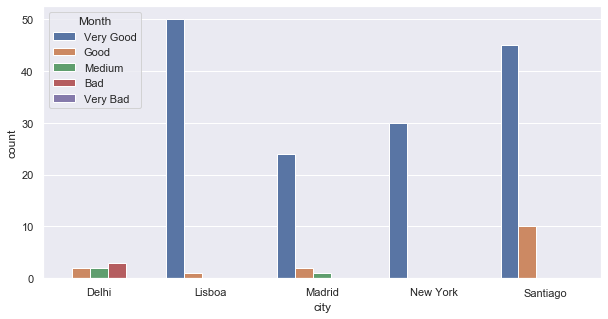

In [210]:

# # Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 5))
sns.set_color_codes("pastel")

# #Plot
# # sns.barplot(x="city", y="AQI", data=pm25_group,
# #             label="x", color="b")

sns.countplot(x="city", hue='AQI', data=pm25_group)

#legend
plt.legend(title='Month', loc='upper left', labels= ['Very Good', 'Good', 'Medium','Bad', 'Very Bad'])

# ax.set_xticklabels(['February, 'March'])
ax1.set_xlabel("Cities")
ax1.set_ylabel("Average PM 2.5 concentration")
ax1.set_title('Average PM 2.5 concentration per month', fontsize=16, fontweight='bold')

# Put the legend out of the figure
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [119]:
pm25_cross = pm_25_group

NameError: name 'pm_25_group' is not defined

In [131]:
from bokeh.io import output_file, show
from bokeh.plotting import figure

colors = ["#c9d9d3", "#718dbf", "#e84d60"]

p = figure(x_range='city', plot_height=250, title="Fruit Counts by Year",
           toolbar_location=None, tools="hover", tooltips="$name @city: @$name")

p.vbar_stack(years, x='city', width=0.9, color=colors, source=pm25_group,
             legend_label='aqi')

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)


NameError: name 'years' is not defined

# To do 

In [118]:
#  mapa.
# lineplots
# IQA

# POp -> Index -> Disponibilidade 

# Criar nova coluna de mean por dia

# pm25_group = pm25.groupby(['city','day', 'month'])['value'].agg(['mean']).reset_index()
# pm25_group.head()

# pm25_group['daily_mean'] = pm25_group(['day']).mean(axis=1)
# pm25_group.head()

TypeError: 'DataFrame' object is not callable